![alt text](https://i.imgur.com/HWXuFrR.png)
#COVID-19 - Pandemic in India


##About COVID-19

The **coronavirus (COVID-19)** emerged in Wuhan in December 2019, has now became a pandemic.
India reported its first covid-19 case on 30th January, when a students arrived in Kerala from Wuhan


The outbreak of COVID-19 is developing into a major international crisis, and it's starting to influence important aspects of daily life. For example in India:

- **Consequences :** 
-Grocery shops are open for limited of hours a day
-People stocked up for mounths
-In most cities and places where commune gatherings occur have been shut down like malls ,cinema etc .
-Travel Ban



**Corona Virus Explained in Simple Terms:**
- Let's say personne1 got infected yesterday, but he won't know it untill next 14 days
- personne1 thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

##Problem Statement:

Its **25th March Afternoon** and India has reported its **9th** death with **562 total confirmed cases** due to COVID-19. Fresh cases from Manipur, Bihar, Gujrat, and Madhya Pradhesh have been reported by the Union Ministry of Health and Family Welfare. 
 
As the coronavirus outbreak continues to spread in the country, the question that we as Indians are trying to answer is : 

**"Will India be able to tackle this pandemic or are we going to witness another Italy/ S.Korea/ Wuhan?"**
### Goal:
We need a strong model that predicts how the virus could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the virus in the next 7 days.
###Tasks to be performed:
- Analysing the present condition in India
- Is this trend similar to Italy/S. Korea/ Wuhan
- Exploring the world wide data
- Forecasting the world wide COVID-19 cases using Prophet

###Importing the required libraries

In [0]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt

#Visualisation in the same window (Not in a separate window)
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#For géografical Data
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 1: Analysing the present condition in India





![](https://i.imgur.com/jUwp2jc.png)

## 1.1 Reading the Datasets


In [0]:
#read a .xls file by creating a dataframe using pandas
# Reading the datasets
import os
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/COVID19/dataset')

df= pd.read_excel('Covid cases in India.xlsx')
df_india = df.copy()
df

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [0]:
# Geographical Coordinates of India States and Union Territories
India_coord = pd.read_csv('/content/drive/My Drive/COVID19/dataset/Indian Coordinates.csv')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/content/drive/My Drive/COVID19/dataset/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/drive/My Drive/COVID19/dataset/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/drive/My Drive/COVID19/dataset/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/drive/My Drive/COVID19/dataset/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

## 1.2 Analysing COVID19 Cases in India

In [0]:
#Creating a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(["S. No."],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562


In [0]:
#highlight our dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


**Visualization Inference:** 
* Manipur and Mizoram reports thier first case. 
* Kerela has crossed Maharashtra in terms of highest number of confirmed cases.
* Haryana and Telengana has the highest count of confirmed Foreign National count.
* Till 25th of March 9 people have died in India
* Kerala, Maharashtra, and karnataka are currently TOP 3 states with maximum number of confirmed cases

## 1.3 Number of Active COVID-19 cases in affected State/Union Territories   

In [0]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


## 1.4 Visualising the spread geographically

In [0]:
#  creating a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## 1.5 Confirmed vs Recovered figures

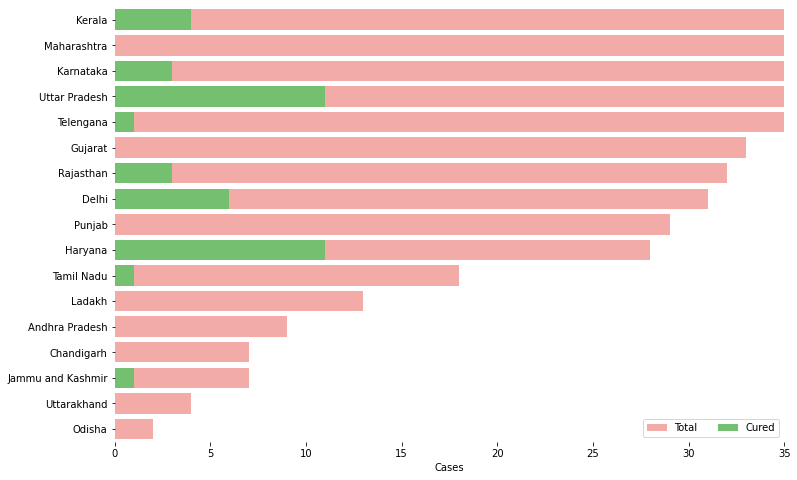

In [0]:
#Use Seaborn for visualization
#Total cases in Pink
#Cured cases in Green
#visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## 1.6 How the Coronavirus cases are rising?

In [0]:
#This cell's code is required when we are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [0]:
#Create an interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()

# Rise of COVID-19 cases in India via plotly.graph     
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

# Part 2: Is the trend similar to Italy/ S.Korea/ Wuhan?


Comparing trends india to Italy, S.Korea, Wuhan

## 2.1 Cumulative cases in India, Italy, S.Korea, and Wuhan

In [0]:
# import plotly.express as px

# Plot cumulative cases x Date --> INDIA
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Plot cumulative cases x Date --> ITALY
fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


# Plot cumulative cases x Date --> S.KOREA
fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Plot cumulative cases x Date --> WUHAN
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

###Visualization Inference
- Confirmed cases in India is rising exponentially with no fixed pattern (Very less test in India)
- Confirmed cases in Italy is rising exponentially with certain fixed pattern
- Confirmed cases in S.Korea is rising gradually
- In Wuhan since last week. They have almost controlled the COVID-19
 

## 2.2 Comparison between the rise of cases in Wuhan, S.Korea, Italy and India

In [0]:
#Create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## 2.3 Trend after crossing 100 cases

In [0]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


#Days after surpassing 100 cases
#S.KOREA
fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
#ITALY
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

#INDIA
fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()


**Visualization Inference:** 

* Above graph depicts the number of days after the COVID-19 cases crosses 100 vs total number of cases in each country. 
* Both Italy and S.Korea have crossed the mark of 5600 in the next 13 days.
* Number of cases detected(trend) in India is less as compared to Italy and S.Korea

##2.4 Why is India testing so little?


[CNN Report](hhttps://www.bbc.com/news/amp/world-asia-india-51922204)
India is testing below scale because it fears that its under-resourced. 



#Part 3:  Exploring World wide data


In [0]:
df = pd.read_csv('/content/drive/My Drive/COVID19/dataset/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/drive/My Drive/COVID19/dataset/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/drive/My Drive/COVID19/dataset/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/drive/My Drive/COVID19/dataset/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [0]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [0]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [0]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


## 3.1 Visualizing: Worldwide NCOVID-19 cases  

In [0]:
#Reset index
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
fig = go.Figure()
#Plotting datewise confirmed cases
#Worldwide NCOVID-19 Cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

#Part 4: Forecasting Total Number of Cases Worldwide

## Prophet
Prophet is open source forecasting procedure software released by Facebook’s Core Data Science team.

## Why Prophet?

* **Accurate and fast:**  Prophet is used for producing reliable forecasts for planning and goal setting. So that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** You can adjust forecasts and use human-interpretable parameters to improve your forecast by adding your domain knowledge


## References 
- https://facebook.github.io/prophet/

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [0]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0



##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
m = Prophet(interval_width=0.95)# 95% sure that our forecast will be correct
m.fit(confirmed)#fitting the graph
future = m.make_future_dataframe(periods=7) #period of 7 days
future.tail()#Need the bottom values

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [0]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,335297.281673,377042.551266
65,2020-03-27,372235.326938,352689.543274,392631.423422
66,2020-03-28,388674.964143,366728.156268,409380.980913
67,2020-03-29,405307.954675,383547.965337,427776.103625
68,2020-03-30,418529.648466,394774.024589,442476.867806


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

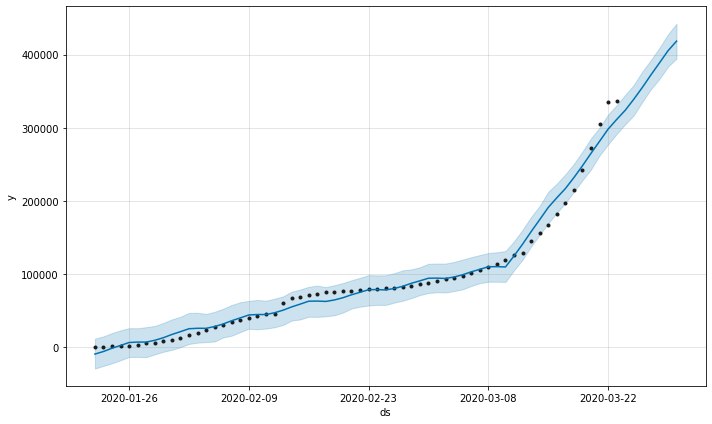

In [0]:
confirmed_forecast_plot = m.plot(forecast)

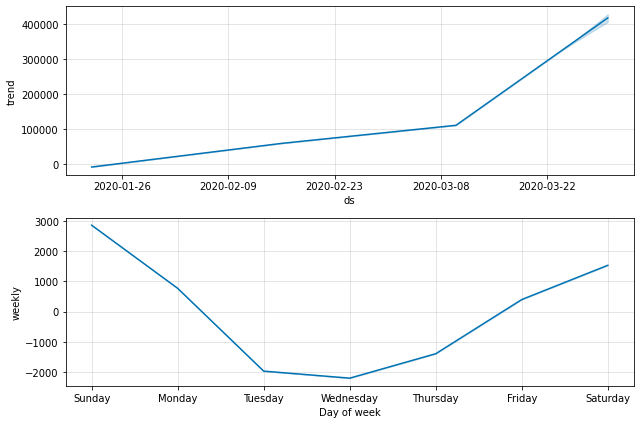

In [0]:
confirmed_forecast_plot =m.plot_components(forecast)

##4.2 Forecasting Worldwide Deaths using Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14497.570710,16353.243758
65,2020-03-27,16199.617603,15221.117305,17230.705711
66,2020-03-28,17006.904589,16015.163010,17970.793480
67,2020-03-29,17831.505383,16812.031329,18810.092288
68,2020-03-30,18490.986176,17393.673443,19552.321103


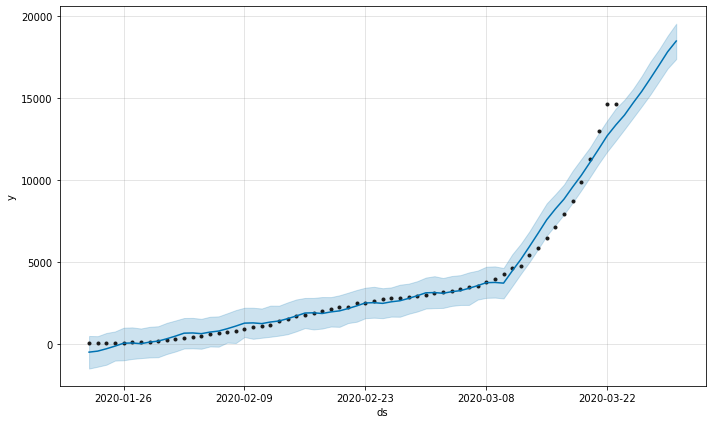

In [0]:
deaths_forecast_plot = m.plot(forecast)

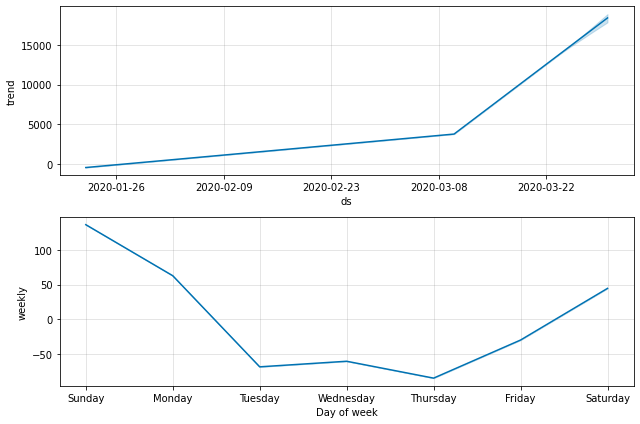

In [0]:
deaths_forecast_plot = m.plot_components(forecast)

##4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [0]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101303.330739,104725.822463
65,2020-03-27,105338.025042,103384.479919,107165.934208
66,2020-03-28,108256.310813,106093.244136,110264.809456
67,2020-03-29,111119.296170,108923.532973,113631.076614
68,2020-03-30,113244.961749,110447.167791,116001.388753


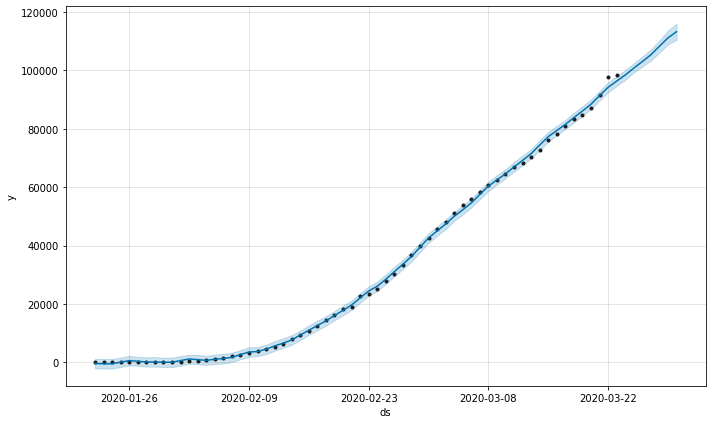

In [0]:
recovered_forecast_plot = m.plot(forecast)

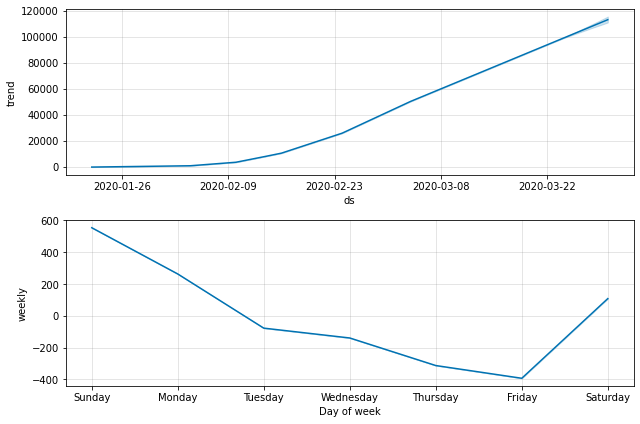

In [0]:
recovered_forecast_plot = m.plot_components(forecast)


##4.4 Inference from the above Analysis and Forecast

#COVID-19 Symptoms

![alt text](https://i.imgur.com/POA1WGb.png)




#**Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

